#### 1.编写一个程序， 打开灰度的lena.bmp，读出以（200,200）为左上角的10*10区域的像素值。

In [2]:
import numpy as np
import struct
import matplotlib.pyplot as plt

In [3]:
f = open("./imagedata/lena.bmp","rb")

f_type = str(f.read(2))
f_size_byte = f.read(4)
f.seek(f.tell()+4)
f_offset_byte = f.read(4)
f.seek(f.tell() + 4)
img_width_byte = f.read(4)
img_height_byte = f.read(4)
f.seek(f.tell() + 2)
f_bitcount_byte = f.read(4)

In [4]:
f_size, = struct.unpack('l',f_size_byte)
f_offset, = struct.unpack('l',f_offset_byte)

img_width, = struct.unpack('l',img_width_byte)
img_height, = struct.unpack('l',img_height_byte)

f_bitcount, = struct.unpack('l',f_bitcount_byte)

print(f"BitCount:{f_bitcount}")
print(f"file_size:{f_size}")
print(f"file_offset:{f_offset}")
print(f"img_width:{img_width}")
print(f"img_height:{img_height}")
print(f"BitCount:{f_bitcount}")



BitCount:8
file_size:66616
file_offset:1078
img_width:256
img_height:256
BitCount:8


In [5]:
color_table = np.empty(shape = [256,4],dtype=int)
f.seek(54)
for i in range(0,256):
    b = struct.unpack('B',f.read(1))[0];
    g = struct.unpack('B',f.read(1))[0];
    r = struct.unpack('B',f.read(1))[0];
    alpha = struct.unpack('B',f.read(1))[0];
    color_table[i][0] = r
    color_table[i][1] = g
    color_table[i][2] = b
    color_table[i][3] = 255
    print(f"({r},{g},{b})")

(0,0,0)
(1,1,1)
(2,2,2)
(3,3,3)
(4,4,4)
(5,5,5)
(6,6,6)
(7,7,7)
(8,8,8)
(9,9,9)
(10,10,10)
(11,11,11)
(12,12,12)
(13,13,13)
(14,14,14)
(15,15,15)
(16,16,16)
(17,17,17)
(18,18,18)
(19,19,19)
(20,20,20)
(21,21,21)
(22,22,22)
(23,23,23)
(24,24,24)
(25,25,25)
(26,26,26)
(27,27,27)
(28,28,28)
(29,29,29)
(30,30,30)
(31,31,31)
(32,32,32)
(33,33,33)
(34,34,34)
(35,35,35)
(36,36,36)
(37,37,37)
(38,38,38)
(39,39,39)
(40,40,40)
(41,41,41)
(42,42,42)
(43,43,43)
(44,44,44)
(45,45,45)
(46,46,46)
(47,47,47)
(48,48,48)
(49,49,49)
(50,50,50)
(51,51,51)
(52,52,52)
(53,53,53)
(54,54,54)
(55,55,55)
(56,56,56)
(57,57,57)
(58,58,58)
(59,59,59)
(60,60,60)
(61,61,61)
(62,62,62)
(63,63,63)
(64,64,64)
(65,65,65)
(66,66,66)
(67,67,67)
(68,68,68)
(69,69,69)
(70,70,70)
(71,71,71)
(72,72,72)
(73,73,73)
(74,74,74)
(75,75,75)
(76,76,76)
(77,77,77)
(78,78,78)
(79,79,79)
(80,80,80)
(81,81,81)
(82,82,82)
(83,83,83)
(84,84,84)
(85,85,85)
(86,86,86)
(87,87,87)
(88,88,88)
(89,89,89)
(90,90,90)
(91,91,91)
(92,92,92)
(93,93,

In [6]:
f.seek(f_offset)

img = np.empty(shape=[img_height,img_width,4],dtype=int)
count = 0
for y in range(0,img_height):
    for x in range(0, img_width):
        count += 1
        index = struct.unpack('B',f.read(1))[0]
        img[img_height-y-1,x] = color_table[index]
    while count % 4 != 0:
        f.read(1)
        count += 1


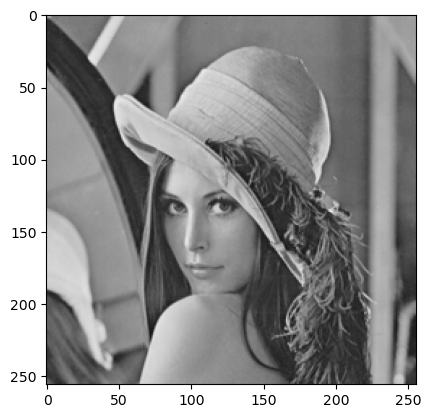

In [7]:
plt.imshow(img)
plt.show()


[[[ 86  86  86]
  [ 73  73  73]
  [ 95  95  95]
  [114 114 114]
  [ 67  67  67]
  [ 48  48  48]
  [ 37  37  37]
  [ 30  30  30]
  [ 94  94  94]
  [108 108 108]]

 [[108 108 108]
  [ 72  72  72]
  [ 98  98  98]
  [132 132 132]
  [ 64  64  64]
  [ 38  38  38]
  [ 32  32  32]
  [ 29  29  29]
  [ 95  95  95]
  [106 106 106]]

 [[ 93  93  93]
  [ 79  79  79]
  [ 75  75  75]
  [136 136 136]
  [110 110 110]
  [ 51  51  51]
  [ 36  36  36]
  [ 47  47  47]
  [ 95  95  95]
  [116 116 116]]

 [[ 69  69  69]
  [ 70  70  70]
  [ 71  71  71]
  [ 84  84  84]
  [128 128 128]
  [129 129 129]
  [110 110 110]
  [121 121 121]
  [129 129 129]
  [122 122 122]]

 [[ 67  67  67]
  [ 61  61  61]
  [ 78  78  78]
  [ 67  67  67]
  [ 75  75  75]
  [103 103 103]
  [109 109 109]
  [ 87  87  87]
  [ 62  62  62]
  [ 58  58  58]]

 [[ 75  75  75]
  [ 59  59  59]
  [ 52  52  52]
  [ 57  57  57]
  [ 61  61  61]
  [ 64  64  64]
  [ 78  78  78]
  [ 62  62  62]
  [ 35  35  35]
  [ 47  47  47]]

 [[ 55  55  55]
  [ 61  61  

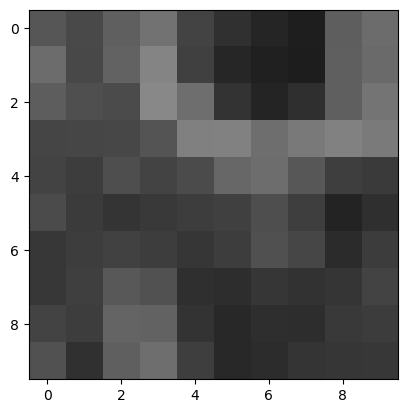

In [8]:
img_1 = img[200:210,200:210]
print(img_1[:,:,0:3])
plt.imshow(img_1)
plt.show()
        


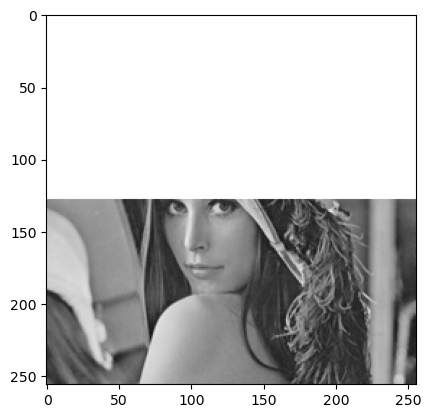

In [9]:
img_2 = img.copy()
img_2[0:128,:,:] = 255
plt.imshow(img_2)
plt.show()
        

In [10]:
color_table_1  = color_table[::-1]


In [11]:
f.seek(f_offset)

img_3 = np.empty(shape=[img_height,img_width,4],dtype=int)
count = 0
for y in range(0,img_height):
    for x in range(0, img_width):
        count += 1
        index = struct.unpack('B',f.read(1))[0]
        img_3[img_height-y-1,x] = color_table_1[index]
    while count % 4 != 0:
        f.read(1)
        count += 1


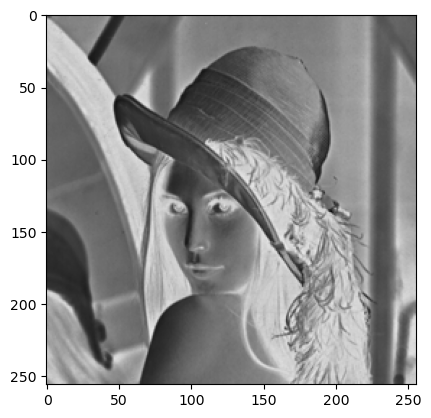

In [12]:
plt.imshow(img_3)
plt.show()


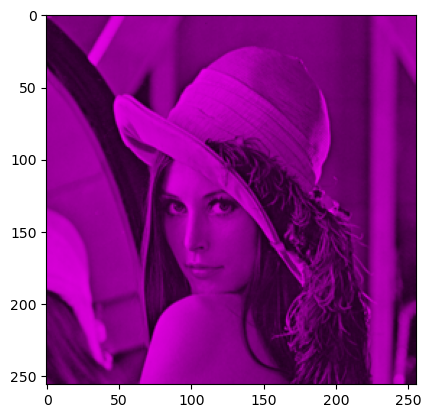

In [13]:
color_table_2  = color_table.copy()
color_table_2[:,1] = 0
f.seek(f_offset)

img_4 = np.empty(shape=[img_height,img_width,4],dtype=int)
count = 0
for y in range(0,img_height):
    for x in range(0, img_width):
        count += 1
        index = struct.unpack('B',f.read(1))[0]
        img_4[img_height-y-1,x] = color_table_2[index]
    while count % 4 != 0:
        f.read(1)
        count += 1

plt.imshow(img_4)
plt.show()        

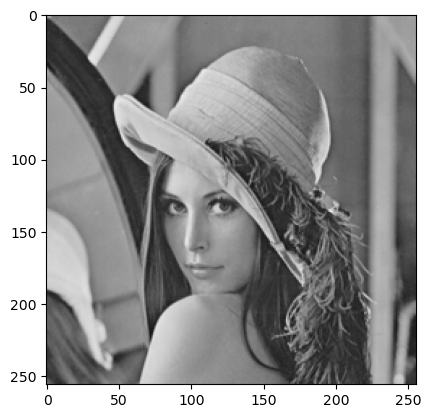

In [14]:
plt.imshow(img)




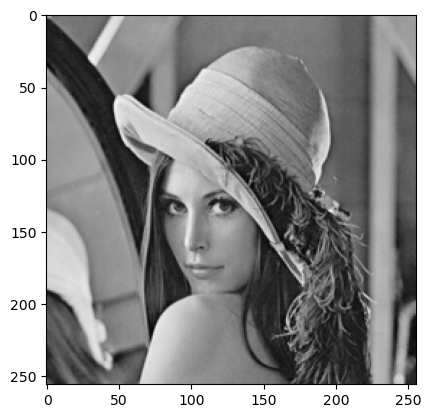

In [18]:
gray_img = img[:,:,0]
np.save('lena_img',gray_img)
plt.imshow(gray_img,cmap='gray')

In [17]:
print(gray_img)

[[142 172 171 ... 160 162 162]
 [146 176 173 ... 160 162 162]
 [115 151 161 ... 160 160 163]
 ...
 [ 92  93  83 ...  52  51  51]
 [ 99 101  93 ...  50  49  46]
 [107 103  99 ...  51  56  44]]
